In [1]:
#importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
#Load the data set

In [7]:
raw_data = pd.read_excel("C:/Foundations Group Project/Loan Data.xlsx")
raw_data

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no
45207,71,retired,divorced,primary,no,1729,no,no
45208,72,retired,married,secondary,no,5715,no,no
45209,57,blue-collar,married,secondary,no,668,no,no


In [19]:
###Creating dummy varialbes

In [21]:
data_with_dummies = pd.get_dummies(raw_data, drop_first = True, dtype = int)
print(data_with_dummies.head(2))
print(data_with_dummies.shape)
data_with_dummies.columns.values

   age  balance  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58     2143                0                 0              0   
1   44       29                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   

   ...  job_unemployed  job_unknown  marital_married  marital_single  \
0  ...               0            0                1               0   
1  ...               0            0                0               1   

   education_secondary  education_tertiary  education_unknown  default_yes  \
0                    0                   1                  0            0   
1                    1                   0                  0            0   

   housing_yes  loan_yes  
0            1         0  
1            1         0  

[2 rows x 21 colu

array(['age', 'balance', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing_yes', 'loan_yes'], dtype=object)

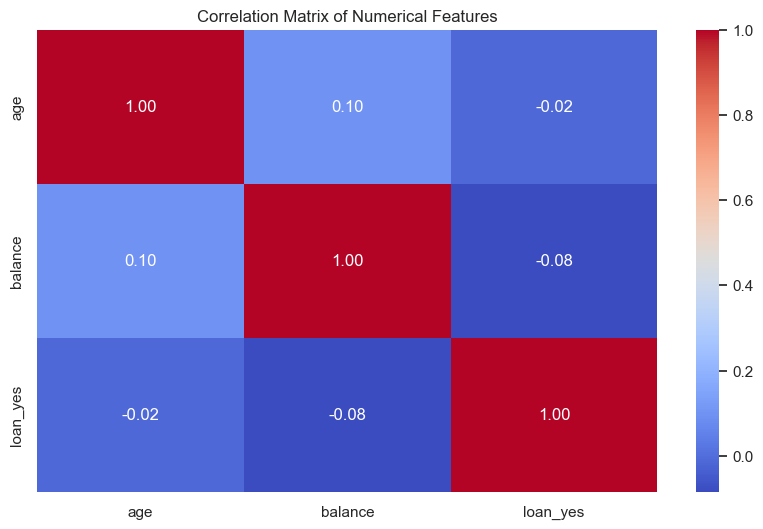

In [23]:
corr_matrix = data_with_dummies[['age','balance','loan_yes']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
###No Strong correlation
###Checking Variance Inflation Factor of all the dimensions

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['age', 'balance', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing_yes']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,age,11.634399
1,balance,1.232937
2,job_blue-collar,2.693941
3,job_entrepreneur,1.304857
4,job_housemaid,1.259826
5,job_management,3.591188
6,job_retired,1.783935
7,job_self-employed,1.326409
8,job_services,1.674586
9,job_student,1.191958


In [31]:
###dropping age from the dataset

In [110]:
data_p1 = data_with_dummies.drop('age', axis = 1)
data_p1.shape

(45211, 20)

In [112]:
###Balancing the data by umsampling rows with loan_yes = 1

In [114]:
data_loan_yes = data_p1[data_p1['loan_yes']==1]
data_loan_no = data_p1[data_p1['loan_yes']==0]
print(data_loan_yes.shape)
print(data_loan_no.shape)

(7244, 20)
(37967, 20)


In [116]:
dp_factor = len(data_loan_no)//len(data_loan_yes)
data_loan_yes_duplicated = pd.concat([data_loan_yes]*dp_factor, ignore_index = True)
balanced_data = pd.concat([data_loan_no, data_loan_yes_duplicated], ignore_index = True)
balanced_data_yes = balanced_data[balanced_data['loan_yes'] == 1]
balanced_data_no = balanced_data[balanced_data['loan_yes'] == 0]
print(len(balanced_data_yes))
print(len(balanced_data_no))
print(balanced_data.shape)

36220
37967
(74187, 20)


In [118]:
data_final = balanced_data.copy()

In [120]:
###Let's move towards building the logistic regression model now

In [122]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
x = data_final.drop('loan_yes', axis = 1)
y = data_final['loan_yes']

In [124]:
###Standardizing the dataset

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.37775393, -0.53414729, -0.20209215, ..., -0.18241137,
        -0.16726144,  0.86113915],
       [-0.41261815, -0.53414729, -0.20209215, ..., -0.18241137,
        -0.16726144,  0.86113915],
       [ 0.13959546,  1.87214279, -0.20209215, ...,  5.48211446,
        -0.16726144,  0.86113915],
       ...,
       [ 0.34634842, -0.53414729, -0.20209215, ..., -0.18241137,
        -0.16726144, -1.16125251],
       [-0.37186576, -0.53414729, -0.20209215, ..., -0.18241137,
        -0.16726144,  0.86113915],
       [-0.23465357, -0.53414729, -0.20209215, ..., -0.18241137,
        -0.16726144, -1.16125251]])

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 13)

In [130]:
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

In [132]:
logreg = sm.Logit(y_train, x_train_const)
results = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.660819
         Iterations 6


In [134]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               loan_yes   No. Observations:                59349
Model:                          Logit   Df Residuals:                    59329
Method:                           MLE   Df Model:                           19
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                 0.04619
Time:                        15:32:55   Log-Likelihood:                -39219.
converged:                       True   LL-Null:                       -41118.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0783      0.009     -9.026      0.000      -0.095      -0.061
x1            -0.3569      0.013    -28.068      0.000      -0.382      -0.332
x2            -0.0377      0.013     -2.901      0.004      -0.063      -0.012
x3             0.0771      0.010      7.764      0.000       0.058       0.097
x4            -0.0704      0.009     -7.458      0.000      -0.089      -0.052
x5            -0.0831      0.014     -5.855      0.000      -0.111      -0.055
x6            -0.0540      0.010     -5.397      0.000      -0.074      -0.034
x7            -0.0415      0.010     -4.360      0.000      -0.060      -0.023
x8             0.0083      0.011      0.776      0.438      -0.013       0.029
x9            -0.2765      0.017    -16.592      0.000      -0.309      -0.244
x10           -0.0242      0.012     -2.036      0.042      -0.047      -0.001
x11           -0.1280      0.010    -13.454      0.000      -0.147      -0.109
x12           -0.1539      0.017     -9.193      0.000      -0.187      -0.121
x13            0.0054      0.013      0.416      0.678      -0.020       0.031
x14           -0.1262      0.013     -9.630      0.000      -0.152      -0.101
x15            0.1167      0.013      8.685      0.000       0.090       0.143
x16            0.0021      0.015      0.137      0.891      -0.028       0.032
x17           -0.1215      0.010    -11.858      0.000      -0.142      -0.101
x18            0.1661      0.010     17.275      0.000       0.147       0.185
x19            0.0543      0.009      6.223      0.000       0.037       0.071
==============================================================================
"""

In [135]:
summary_df = pd.DataFrame({'Coefficients': results.params, 'P-values': results.pvalues, 'Standard Errors': results.bse})
cols1 = x.columns.values
cols2 = np.insert(cols1, 0, 'const')
cols2
summary_df['variables'] = cols2
summary_df.reset_index(drop = True)
cols = summary_df.columns.tolist()
cols = [cols[-1]]+cols[:-1]
summary_df=summary_df[cols]
summary_df['Odds'] = np.exp(summary_df['Coefficients'])
summary_df.sort_values(by = 'Odds', ascending = False)

,variables,Coefficients,P-values,Standard Errors,Odds
x18,default_yes,0.166120,7.256540e-67,0.009616,1.180715
x15,education_secondary,0.116714,3.775940e-18,0.013438,1.123798
x3,job_entrepreneur,0.077100,8.202164e-15,0.009930,1.080150
x19,housing_yes,0.054310,4.873327e-10,0.008727,1.055812
x8,job_services,0.008319,4.376305e-01,0.010717,1.008353
x13,marital_married,0.005400,6.777187e-01,0.012993,1.005414
x16,education_tertiary,0.002103,8.906427e-01,0.015295,1.002105
x10,job_technician,-0.024174,4.176225e-02,0.011874,0.976116
x2,job_blue-collar,-0.037693,3.716525e-03,0.012992,0.963008
x7,job_self-employed,-0.041480,1.298829e-05,0.009513,0.959368


In [138]:
###Lets test this now

In [140]:
y_pred_prob = results.predict(x_test_const)
y_pred = (y_pred_prob>=0.5).astype(int)

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[4197 3338]
 [2776 4527]]


In [144]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5879498584714921

Text(0.5, 427.9555555555555, 'Predicted label')

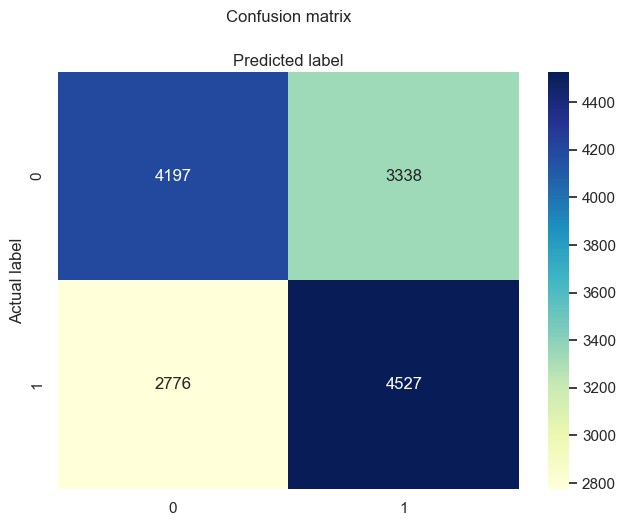

In [146]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
###Modeling a Decision Tree for it

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [2,4,8,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,5]
}

In [155]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5, 
                           scoring='accuracy',
                           verbose=1)  

In [157]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [158]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(max_depth=10)


In [159]:
best_model = grid_search.best_estimator_

In [160]:
y1_pred = best_model.predict(x_test)

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
test_accuracy = accuracy_score(y_test, y1_pred)
print(test_accuracy)
print(confusion_matrix(y_test,y1_pred))

0.6246798759940693
[[4177 3358]
 [2211 5092]]


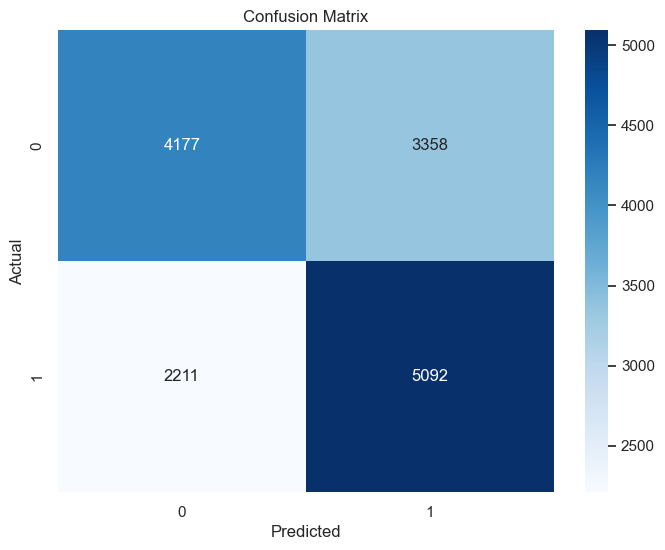

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y1_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [169]:
###The features are not good enough to predict the likelihood of loan